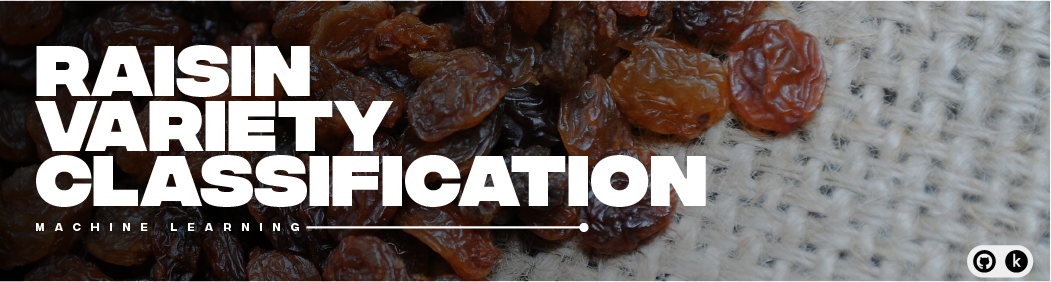

# **🗄️Importing Data**
---
Here, we import all the required libraries and the main **`CSV`** data source.

In [1]:
# dataframe handling
import numpy as np
import pandas as pd

# warning handling
import warnings

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# disabling warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# reading the source file
df = pd.read_csv("raisin_data.csv")

In [4]:
# viewing data
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


# **💹Analysing Data**
---
We check a few information of the dataset.

In [5]:
# dimension of the data
df.shape

(900, 8)

In [6]:
# data information at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
# finding the total number of null values in each column
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [8]:
# statistical information
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


### **Kernel Density Estimate(KDE)**
- To assess linearity, plot distributions and check skewness using **Kernel Density Estimates (KDE)**.

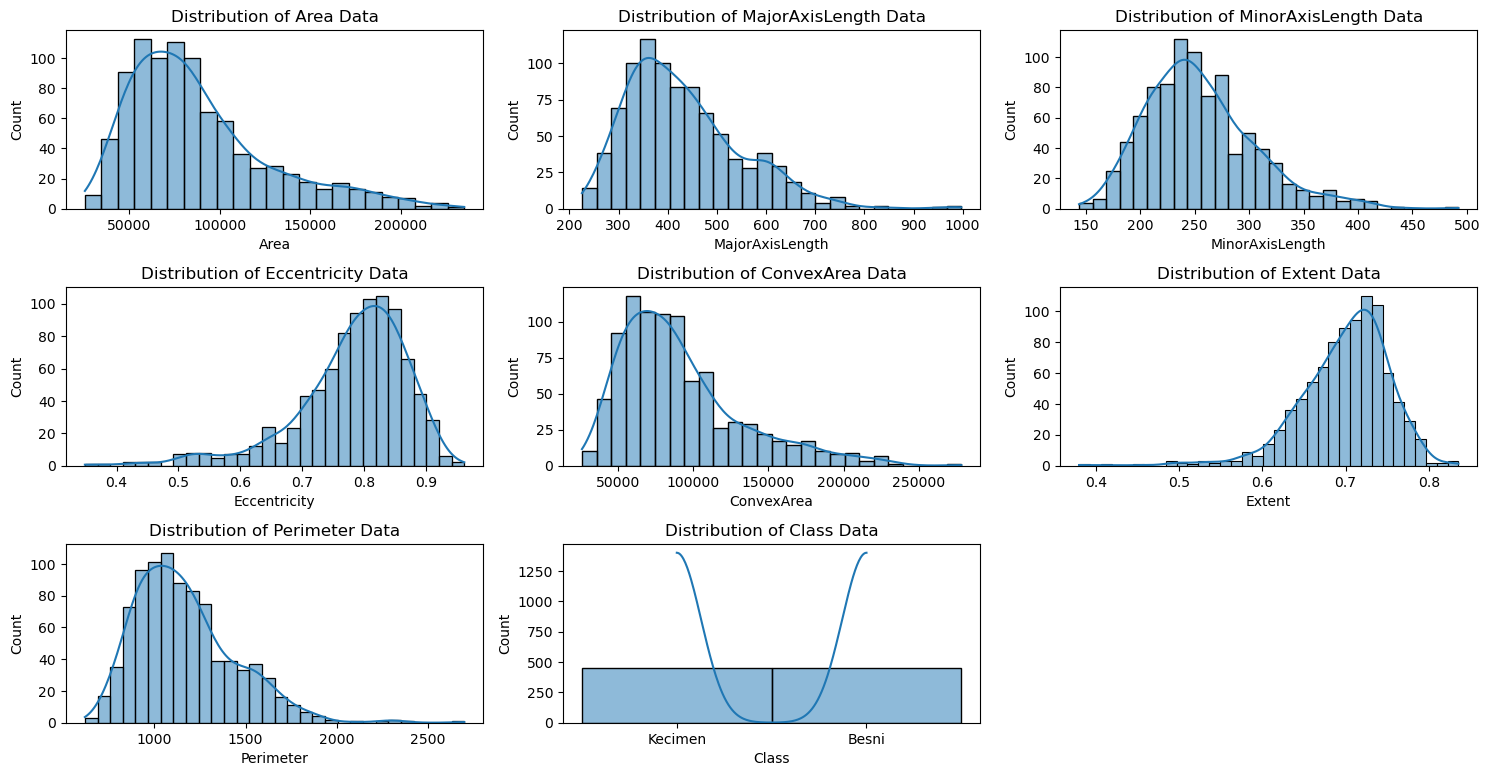

In [9]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

`OBSERVATION:` The KDE plot indicates that the data points are not normally distributed; rather, they show skewness in certain areas, but overall, they exhibit a unimodal distribution.

### **Pairplot**
- To visualize correlation of the different features, we use **Pairplot**.

[]

<Figure size 1500x1000 with 0 Axes>

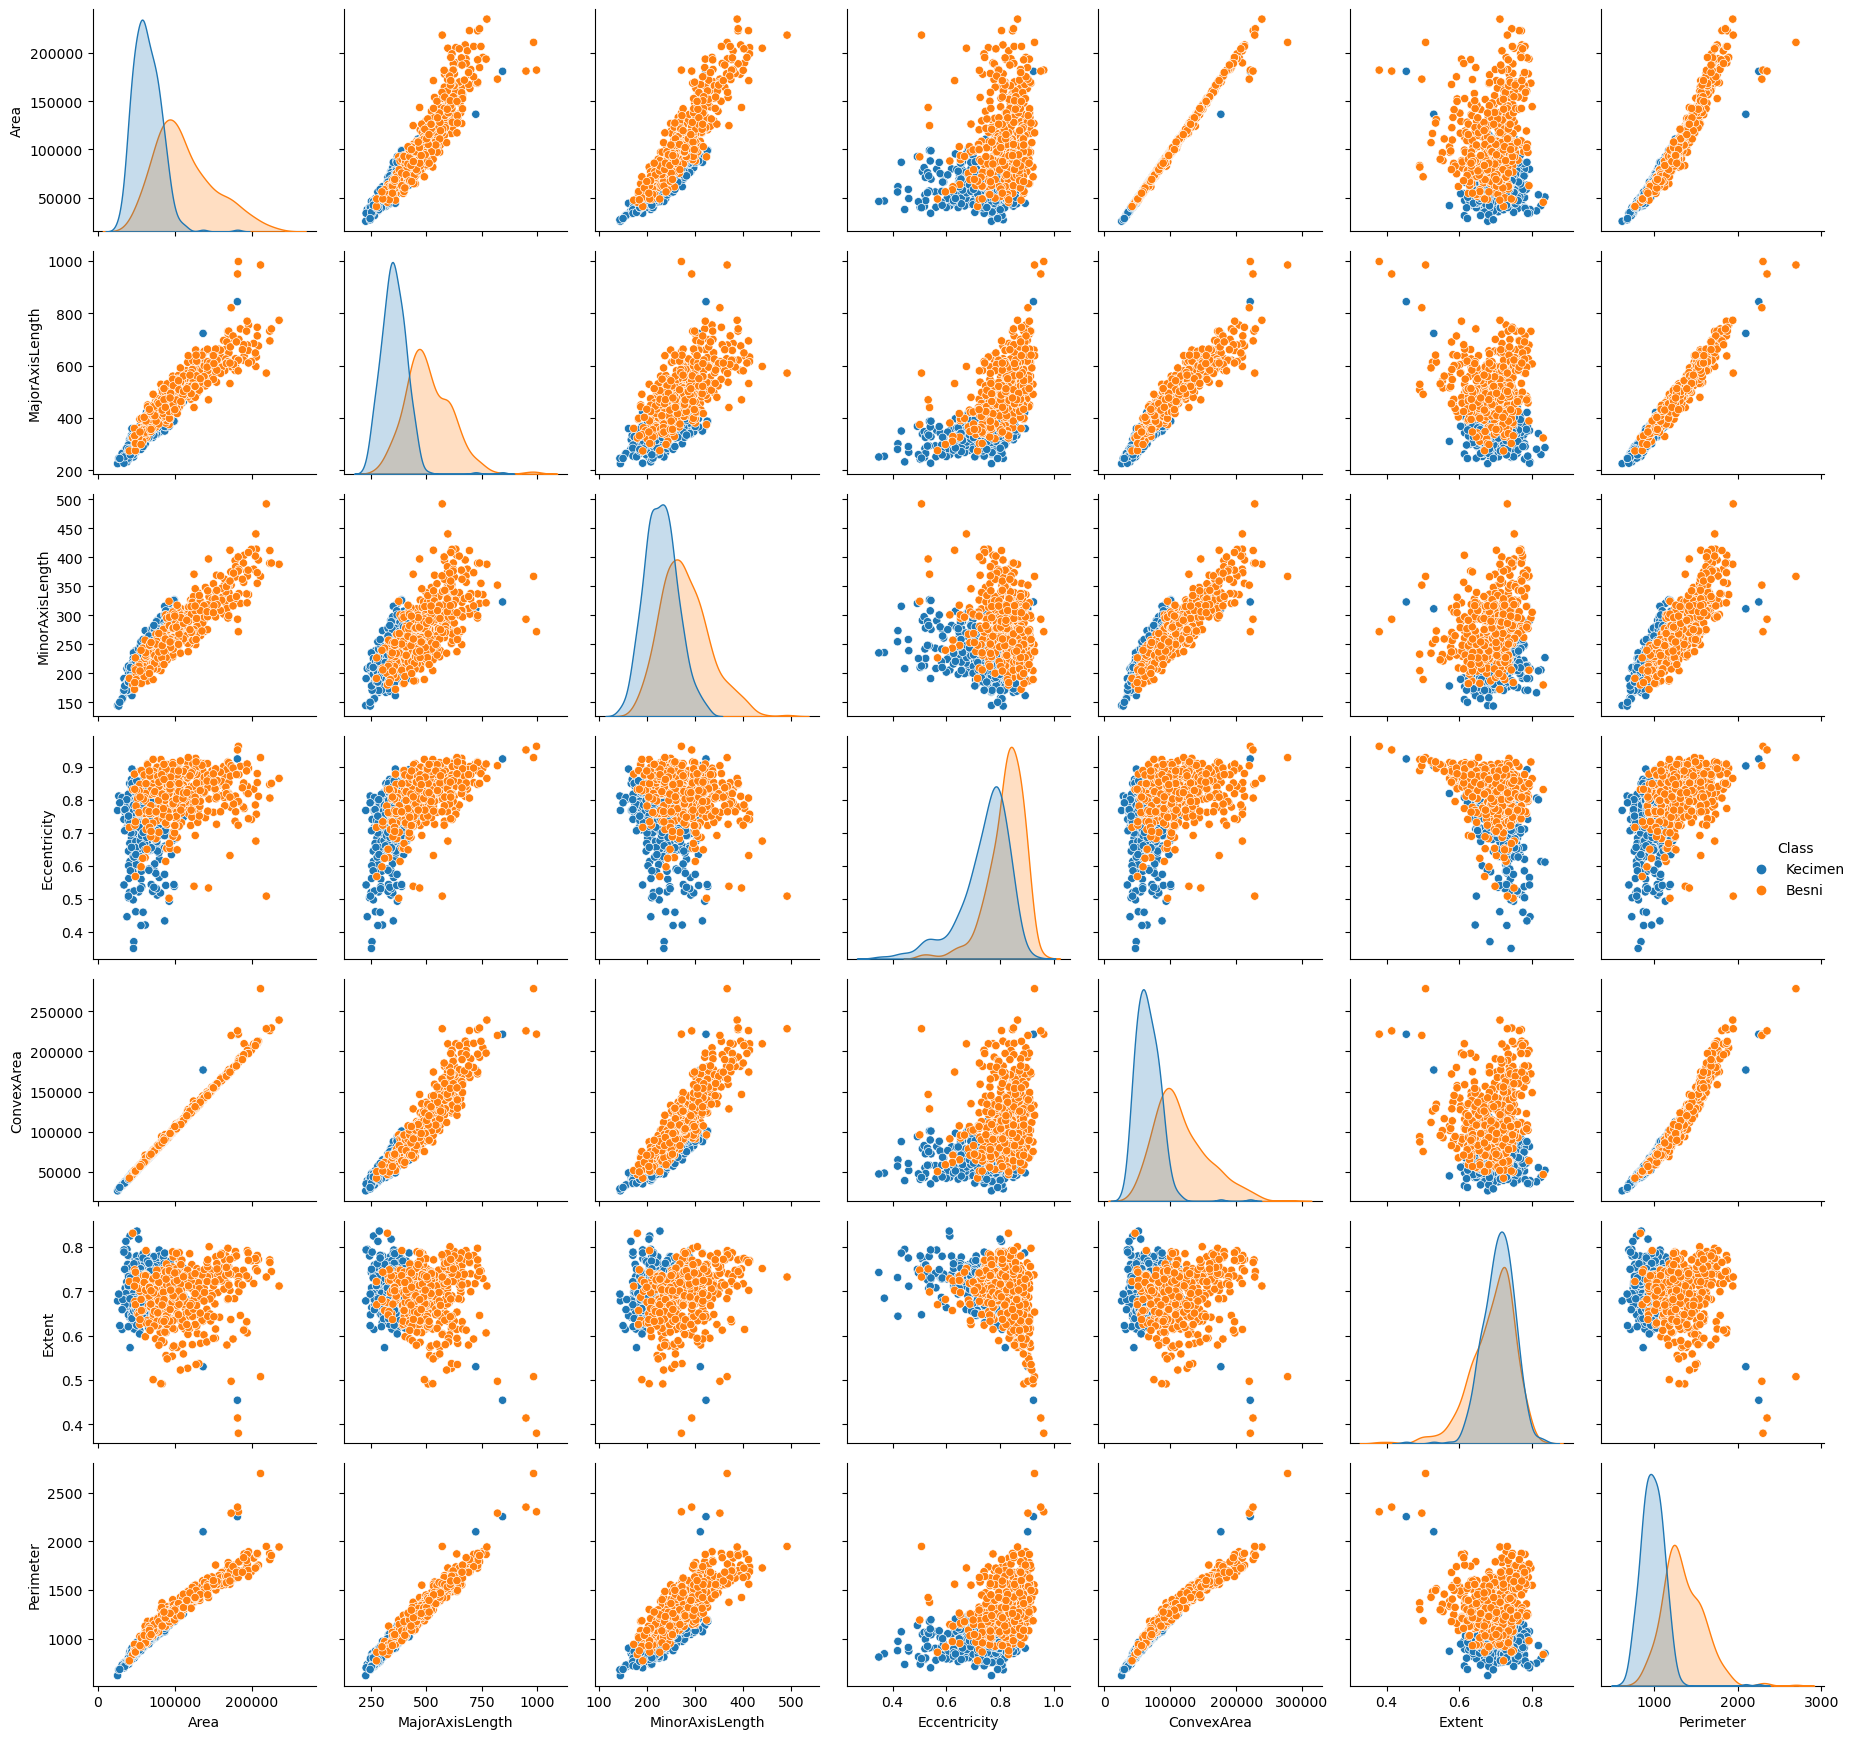

In [10]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Class")
plt.tight_layout()
plt.plot()

`CONCLUSION:` The pairplot shows that, some of the features exibit very high positive correlation among them whereas some other are not correlated at all.

## **Heatmap**
- To visualize the correlation in a numerical form, we use **Heatmaps**.

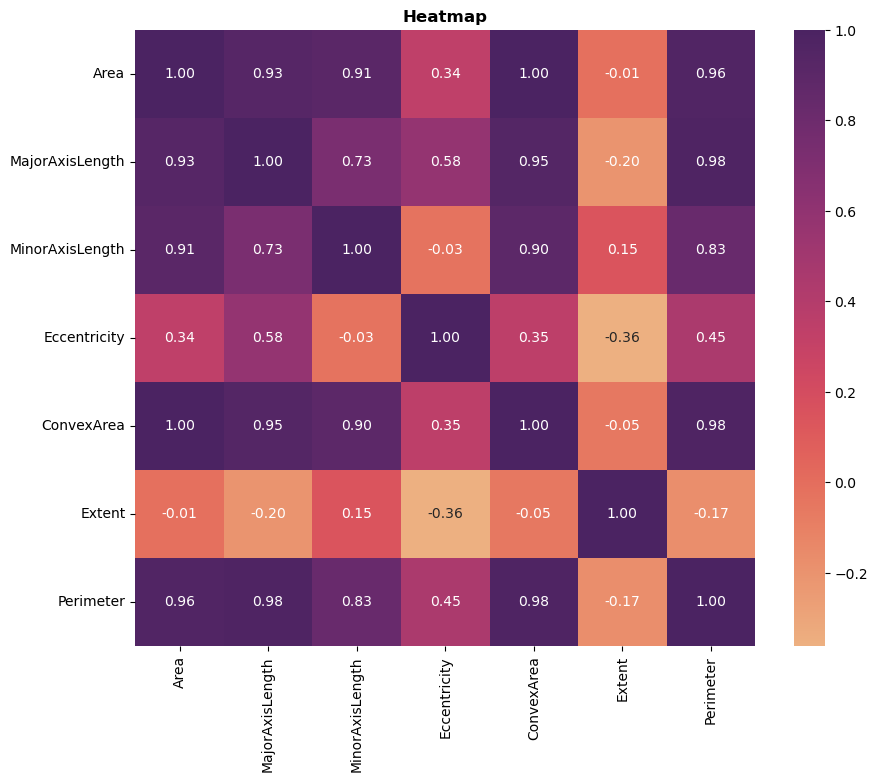

In [11]:
# defining numeric columns
num_cols = df.drop("Class", axis = 1)

# determinig correlation
correlation = num_cols.corr()

# defining figure size
plt.figure(figsize = (10,8))

# plot title
plt.title("Heatmap", fontweight = "bold")

# generating relevant heatmap using correlation data
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='flare')

# plotting heatmap
plt.show()

`CONCLUSION:` As already observed from pairplot, there is high correlation between some features whereas some exibit very low values.

# **🧹Data Cleaning**
---
Before moving any furhtur, we need to clean the data of null `values`, `outliers`, `inconsistent data` and so on.

### **1. Cleaning Outliers**
- Outliers are a major hinderence in `Machine Learning` and they must be removed before processing or analysing the data.

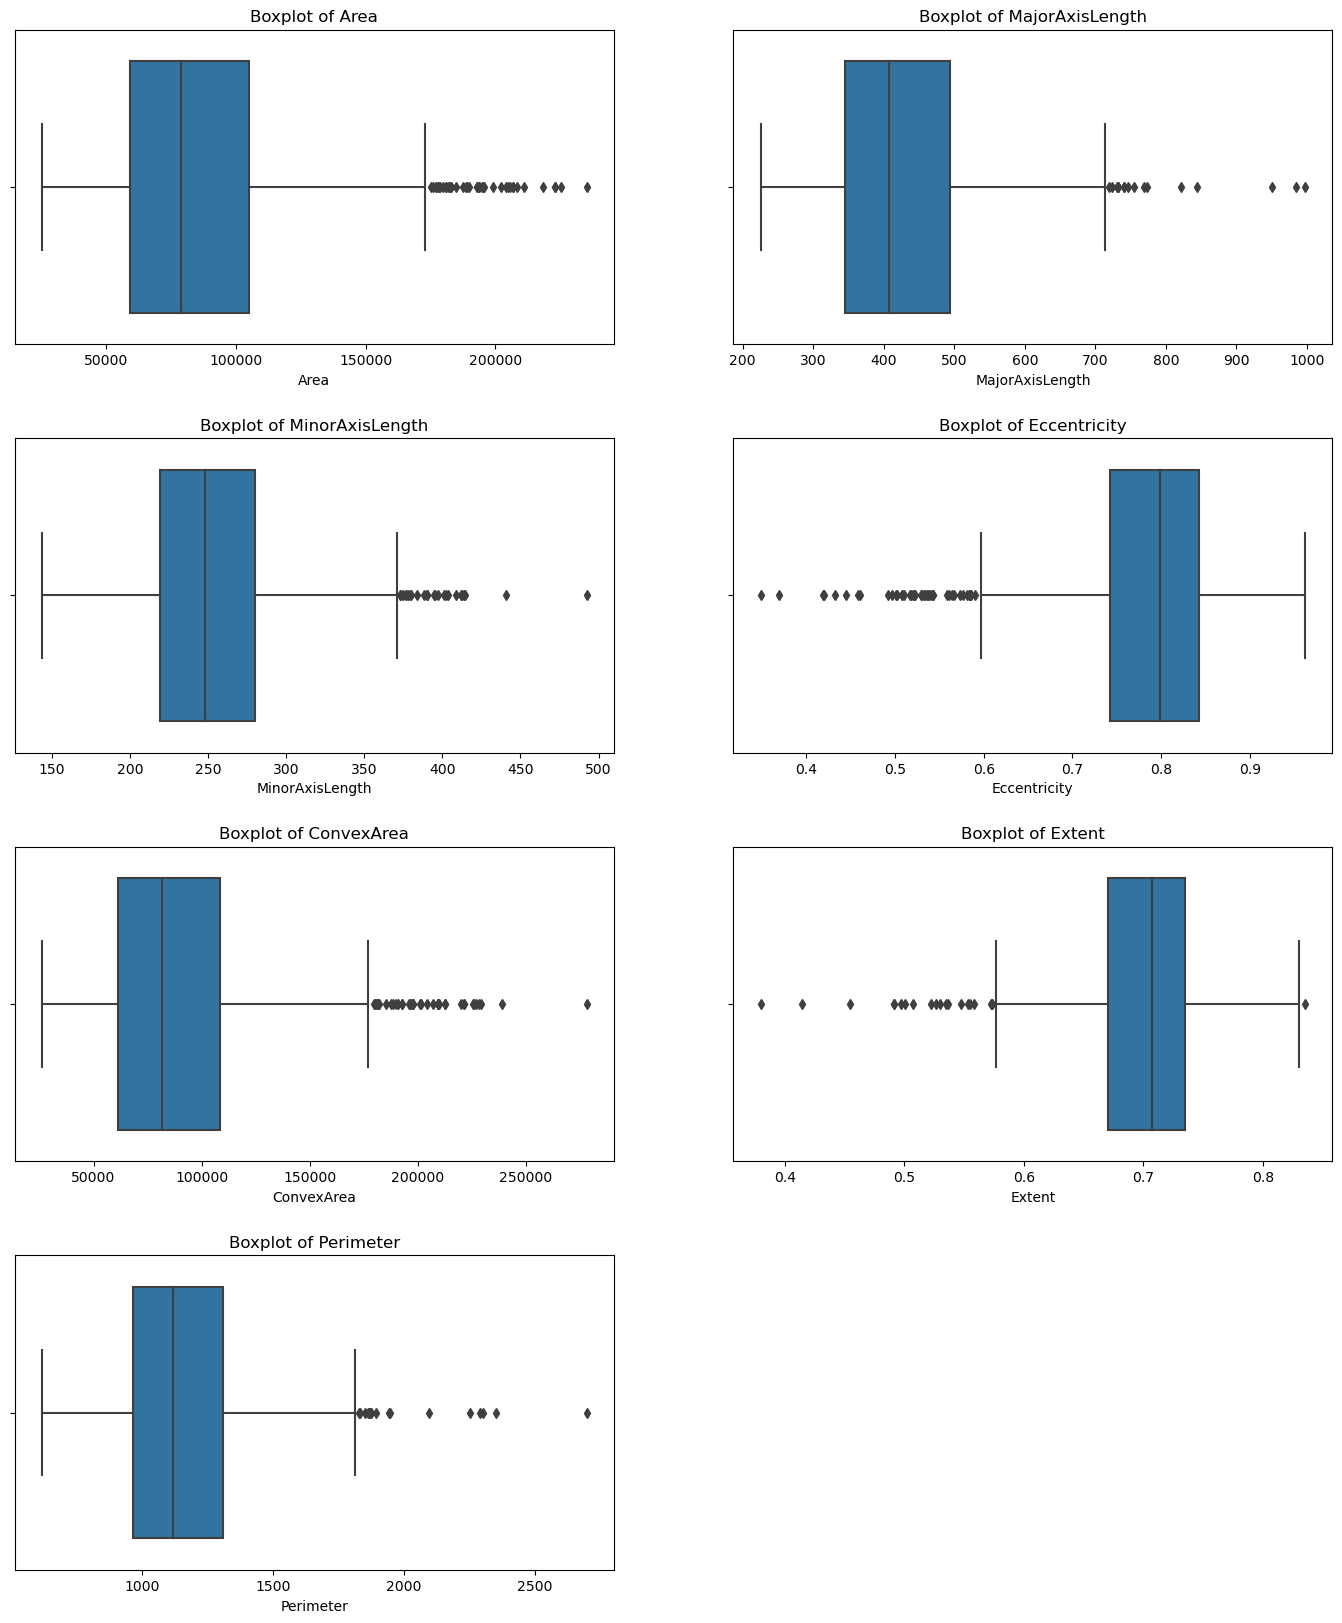

In [12]:
# defining features excluding the 'Class' column
features = df.columns[df.columns != 'Class']

# declaring total number of rows and columns
rows = 4
cols = 2

# creating subplots
fig, axes = plt.subplots(rows, cols, figsize=(17, 5*rows))

# Flatten the axes if necessary
axes = axes.flatten()

# horizontal space between boxplots
plt.subplots_adjust(hspace=0.3)

# plotting individual boxplot for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    
# removing empty subplots if the number of features doesn't perfectly fit into the grid
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

- We can see that there are several outliers in each column. We can effectively manage outliers in our dataset by utilizing a method called **`replace_outliers_with_bounds`**. This method helps identify outliers within the distribution of numeric features associated with raisin class and replaces them with appropriate lower or upper bounds.

- Implementing this approach allows us to eliminate outliers from our data, ensuring its robustness and suitability for subsequent analysis and modeling. By minimizing the potential impact of outliers on our predictive models, we can enhance the reliability and accuracy of our predictions.

In [13]:
# defining function to replace outliers
def replace_outliers_with_bounds(df):
    # numeric columns
    numeric_columns = df.drop("Class", axis = 1)
    
    # looping through each column
    for col in numeric_columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR)  # Cast to float
        upper_bound = float(q3 + 1.5 * IQR)  # Cast to float

        # replacing outliers with bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# running function to replace outliers
df = replace_outliers_with_bounds(df)

- Checking bloxplots after removing **`outliers`**.

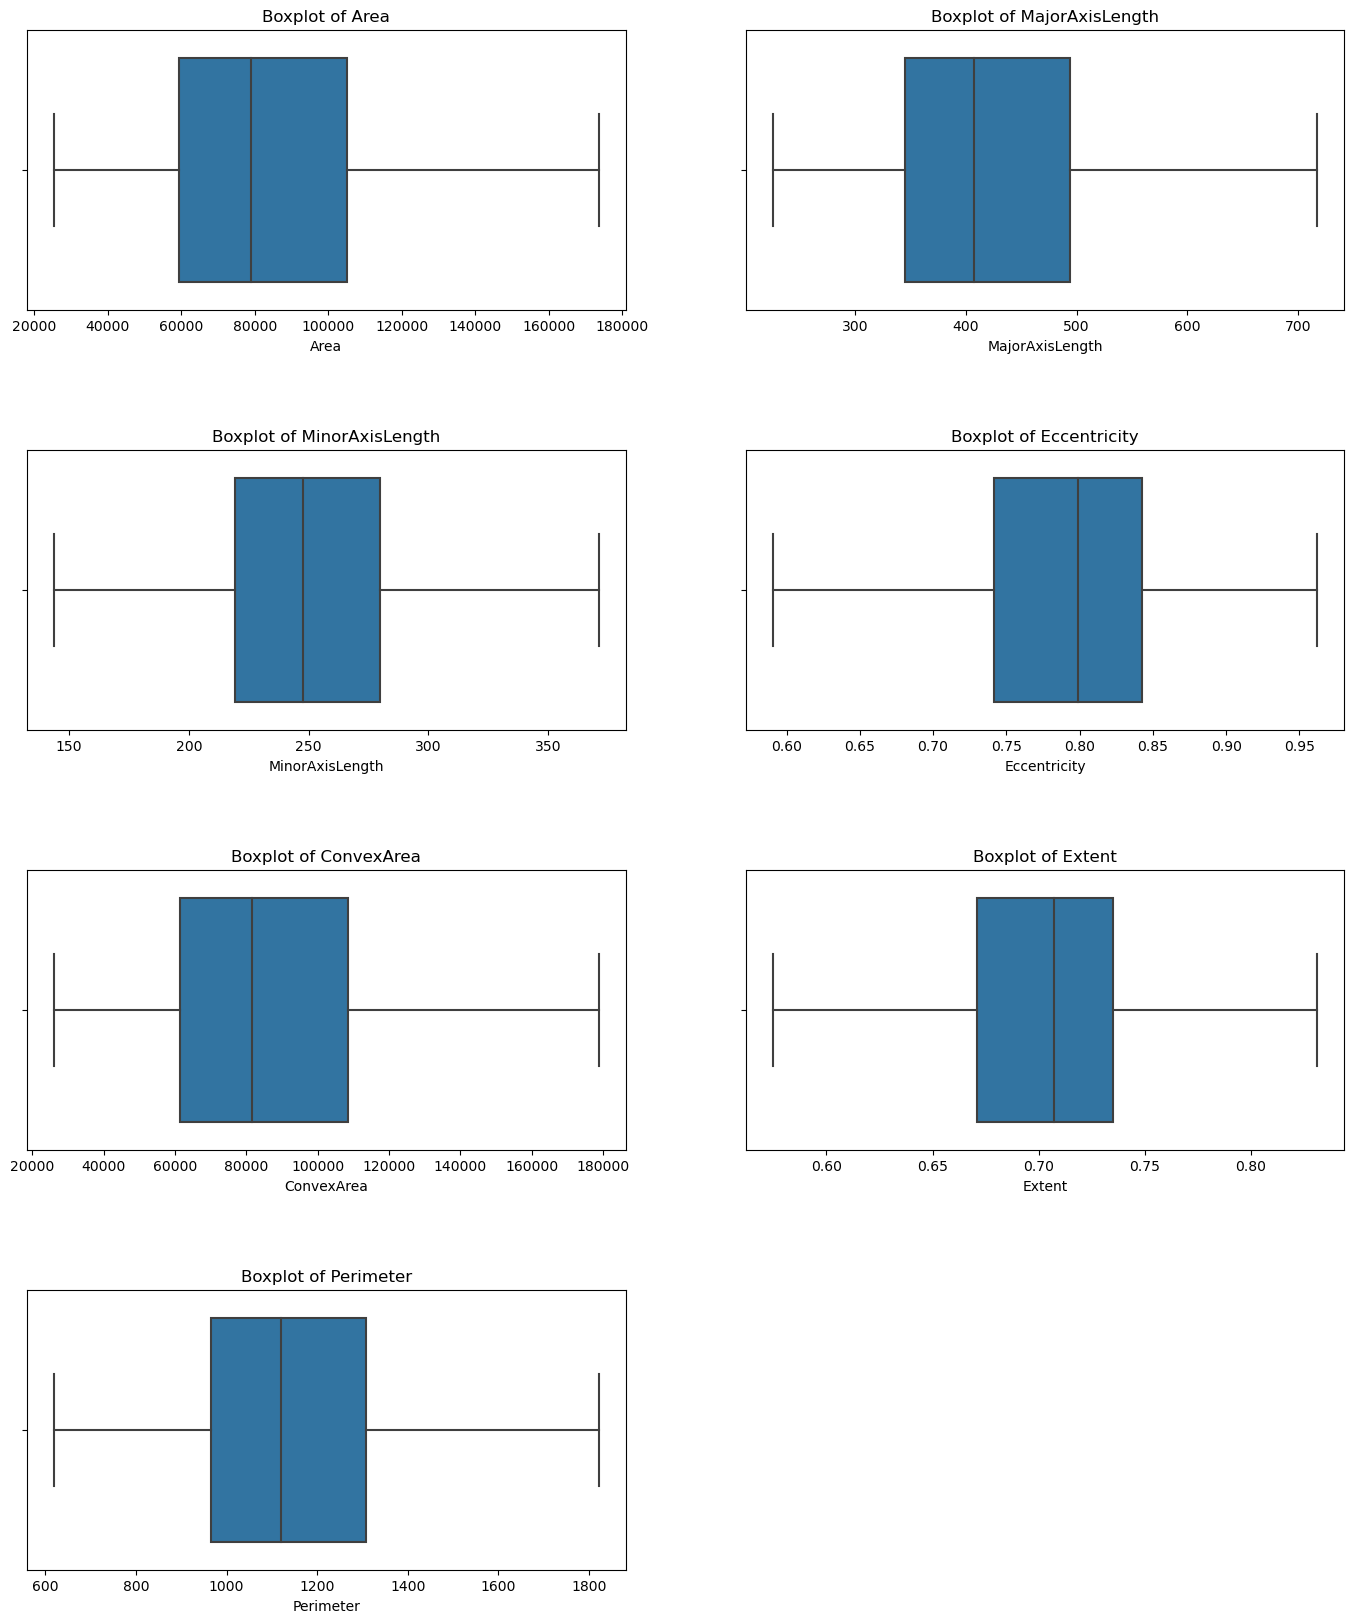

In [14]:
features = df.columns[df.columns != 'Class']
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 5*num_rows))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# **🔪Data Pre-Processing**
---
Before the data is processed for any training and testing purposes, we need to make it ready for such tasks.

### **1. Encoding Class**

In [15]:
# creating a label encoder class
label_encoder = LabelEncoder()

# encoding
df['Class'] = label_encoder.fit_transform(df['Class'])

# viewing data
df.head(3)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1


# **🤖Machine Learning**
---
Here, we implement several **Machine Learning(ML)** models to check which one performs the best

- **Splitting Data**

In [16]:
X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.12, random_state = 42)

- **Standardizing Data**

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## **1. Logistic Regression**

In [18]:
# training model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# making classifications
lr_y_pred = lr_model.predict(X_test)

# checking score
LR = accuracy_score(y_test, lr_y_pred)

# printing Classification Report
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        54
           1       0.88      0.96      0.92        54

    accuracy                           0.92       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.92      0.92      0.92       108



## **2. Support Vector Machine**

In [19]:
# creating an instance of SVM class
svm_model = SVC()
svm_model.fit(X_train, y_train)

# maing predictions
svm_y_pred = svm_model.predict(X_test)

# checking score
SVM = accuracy_score(y_test, svm_y_pred)

# printing Classification Report
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90        54
           1       0.85      0.98      0.91        54

    accuracy                           0.91       108
   macro avg       0.92      0.91      0.91       108
weighted avg       0.92      0.91      0.91       108



## **3. K Nearest Neighbours**

In [20]:
# building a function to test best neighbour 
def KNN(k):
    # building a KNN model (default k=5)
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # fitting the model to the training data
    knn_model.fit(X_train, y_train)

    # making predictions on the test set
    y_pred_knn = knn_model.predict(X_test)

    # evaluating the model's accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    return accuracy_knn

In [21]:
# finding the best n value
k_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

best_accuracy = 0
best_k = None

for k in k_values:
    accuracy = KNN(k)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best Accuracy: {0:0.5f} for K = {1}".format(best_accuracy, best_k))

KNN = best_accuracy

Best Accuracy: 0.90741 for K = 10


## **4. Decision Tree Classifier**

In [22]:
# Creating an instance of Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth = 10)

# Fitting the model to the training data
dt_model.fit(X_train, y_train)

# Making predictions
dt_y_pred = dt_model.predict(X_test)

# Checking accuracy
DTC = accuracy_score(y_test, dt_y_pred)

# Printing Classification Report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        54
           1       0.83      0.81      0.82        54

    accuracy                           0.82       108
   macro avg       0.82      0.82      0.82       108
weighted avg       0.82      0.82      0.82       108



## **5. Decision Tree Classifier (with Adaboost)**

In [23]:
# creating model class
dt_model = DecisionTreeClassifier(max_depth = 12)

# using boosting filter
dt_ada_model = AdaBoostClassifier(estimator=dt_model, n_estimators=50, learning_rate=0.75, random_state=42, algorithm = "SAMME")

# fitting model with training data
dt_ada_model.fit(X_train, y_train)

# make predictions
dt_y_pred = dt_ada_model.predict(X_test)

# getting accuracy score
DTC_ADA = accuracy_score(y_test, dt_y_pred)

# printing accuracy report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.83      0.89      0.86        54

    accuracy                           0.85       108
   macro avg       0.85      0.85      0.85       108
weighted avg       0.85      0.85      0.85       108



## **6. Naive Baye's Classifier**

In [24]:
# Creating an instance of Gaussian Naive Bayes Classifier
nb_model = GaussianNB()

# Fitting the model to the training data
nb_model.fit(X_train, y_train)

# Making predictions
nb_y_pred = nb_model.predict(X_test)

# Checking accuracy
NB = accuracy_score(y_test, nb_y_pred)

# Printing Classification Report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85        54
           1       0.80      0.98      0.88        54

    accuracy                           0.87       108
   macro avg       0.89      0.87      0.87       108
weighted avg       0.89      0.87      0.87       108



## **7. XG Boost Classifier**

In [25]:
# Creating an instance of XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions
xgb_y_pred = xgb_model.predict(X_test)

# Checking accuracy
XGB = accuracy_score(y_test, xgb_y_pred)

# Printing Classification Report
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        54
           1       0.85      0.94      0.89        54

    accuracy                           0.89       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.89      0.89      0.89       108



## **8. Bagging Classifier**

In [26]:
# creating bagging classifier model
bagging_model = BaggingClassifier()

bagging_model.fit(X_train, y_train)

bag_y_pred = bagging_model.predict(X_test)

BAG = accuracy_score(y_test, bag_y_pred)

# Printing Classification Report
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        54
           1       0.85      0.94      0.89        54

    accuracy                           0.89       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.89      0.89      0.89       108



## **9. Ridge Classifier**

In [27]:
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)

ridge_y_pred = ridge_model.predict(X_test)

RC = accuracy_score(y_test, ridge_y_pred)

# Printing Classification Report
print(classification_report(y_test, ridge_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.90      0.98      0.94        54

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



## **10. Gradient Boosting Classifier**

In [28]:
gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.5, random_state = 42)
gbc_model.fit(X_train, y_train)

gbc_y_pred = gbc_model.predict(X_test)

GBC = accuracy_score(y_test, gbc_y_pred)

# Printing Classification Report
print(classification_report(y_test, gbc_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.86      0.91      0.88        54

    accuracy                           0.88       108
   macro avg       0.88      0.88      0.88       108
weighted avg       0.88      0.88      0.88       108



## **11. Catboost Classifier**

In [29]:
cbc_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
cbc_model.fit(X_train, y_train)

cbc_y_pred = cbc_model.predict(X_test)

CB = accuracy_score(y_test, cbc_y_pred)

# Printing Classification Report
print(classification_report(y_test, cbc_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        54
           1       0.87      0.96      0.91        54

    accuracy                           0.91       108
   macro avg       0.91      0.91      0.91       108
weighted avg       0.91      0.91      0.91       108



## **12. Random Forest Classifier**

In [30]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

rfc_pred = rfc_model.predict(X_test)

RFC = accuracy_score(y_test, rfc_pred)

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        54
           1       0.83      0.96      0.89        54

    accuracy                           0.88       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.89      0.88      0.88       108



## **13. Light GBM Classifier**

In [31]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

LGBM = accuracy_score(y_test, lgbm_pred)
print(classification_report(y_test, lgbm_pred))

[LightGBM] [Info] Number of positive: 396, number of negative: 396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.80      0.91      0.85        54

    accuracy                           0.84       108
   macro avg       0.85      0.84      0.84       108
weighte

## **14. Extra Tree Classifier**

In [32]:
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)

etc_pred = etc_model.predict(X_test)

ETC = accuracy_score(y_test, etc_pred)
print(classification_report(y_test, etc_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        54
           1       0.81      0.96      0.88        54

    accuracy                           0.87       108
   macro avg       0.88      0.87      0.87       108
weighted avg       0.88      0.87      0.87       108



## **15. Linear Discriminant Analysis**

In [33]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

lda_pred = lda_model.predict(X_test)

LDA = accuracy_score(y_test, lda_pred)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.89      0.94      0.92        54

    accuracy                           0.92       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.92      0.92      0.92       108



## **16. Quadratic Discriminant Analysis**

In [34]:
qda_model = LinearDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

qda_pred = qda_model.predict(X_test)

QDA = accuracy_score(y_test, qda_pred)
print(classification_report(y_test, qda_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.89      0.94      0.92        54

    accuracy                           0.92       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.92      0.92      0.92       108



# **📝CONCLUSION**
---

In [35]:
# summarizing all ML Model accuracies
accuracy = {"LR" : LR, "SVM" : SVM, "KNN" : KNN, "DTC" : DTC, "ADA" : DTC_ADA, "NB" : NB, "XGB" : XGB, "BAG" : BAG, "RC" : RC, "GBC" : GBC, "CB" : CB, "RFC" : RFC, "LGBM" : LGBM, "ETC" : ETC, "LDA" : LDA, "QDA" : QDA}

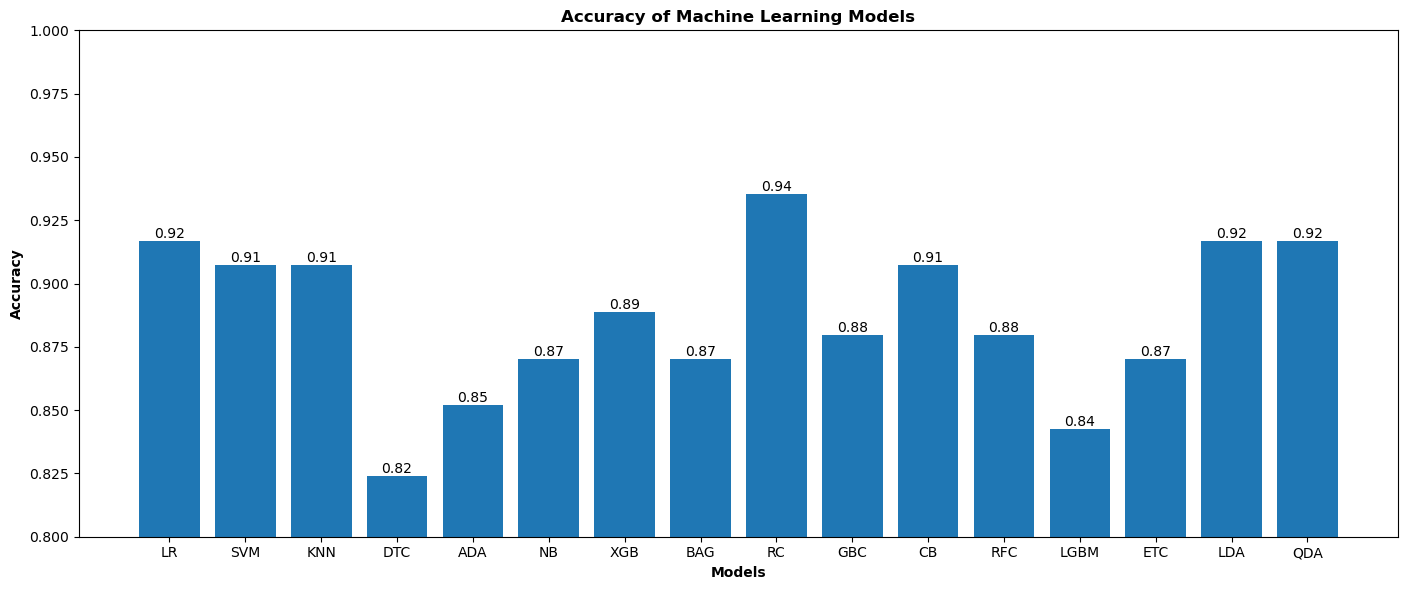

In [36]:
# Plotting accuracy scores
plt.figure(figsize=(14, 6))
bars = plt.bar(accuracy.keys(), accuracy.values())

# Adding annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.xlabel('Models', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.title('Accuracy of Machine Learning Models', fontweight = 'bold')
plt.tight_layout()
plt.ylim(0.8, 1)
plt.show()

**`CONCLUSION:`** **Ridge Classifier** has performed the best, with a accuracy score of 94%.

# **🙏THANK YOU**
---